<a href="https://colab.research.google.com/github/Tayal-17/Assignment_1/blob/main/WheresWaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **WELCOME TO WHERES WALDO AI MODEL**
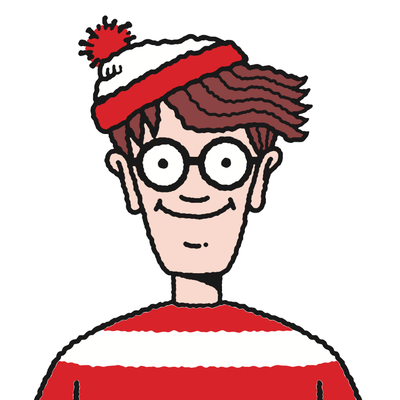
> This project is developed by Prakhar Tayal and Rajat Murarka.
The code is there for your own training and testing, However you can choose to use our already trained model weights uploaded in our Github Repository.



In [ ]:
# setting up the YOLOv5 Model
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
# Importing Pytorch
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-356-g2070b303 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/201.2 GB disk)


Specify the dataset directory after downloading from the repo. Make sure that you adjust the data.yaml file directing all the correct paths

In [ ]:
# Training Data if you want to train the model
!python train.py --img 640 --batch 16 --epochs 100  --data /content/WhereIsWally/data.yaml --weights yolov5m.pt --name waldofinal --hyp /content/yolov5/data/hyps/hyp.scratch-med.yaml --cache

In [ ]:
# Using the Tensorboard to visualize the results for the model
%load_ext tensorboard
%tensorboard --logdir runs/train


In [ ]:
# Validation for the model
!python val.py --weights runs/train/waldofinal2/weights/best.pt --data /content/WhereIsWally/data.yaml --img 640



# In order to test custom uploaded images, specify the path in the next code cell. For best results use a high resolution image.

In [ ]:

# Testing the model on the Dataset test

!python detect.py --weights /content/drive/MyDrive/new/best.pt --img 640 --conf 0.25 --source /your image path here /

detect: weights=['/content/drive/MyDrive/new/best.pt'], source=/content/test4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-356-g2070b303 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/test4.jpg: 416x640 1 waldo, 52.3ms
Speed: 0.7ms pre-process, 52.3ms inference, 611.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


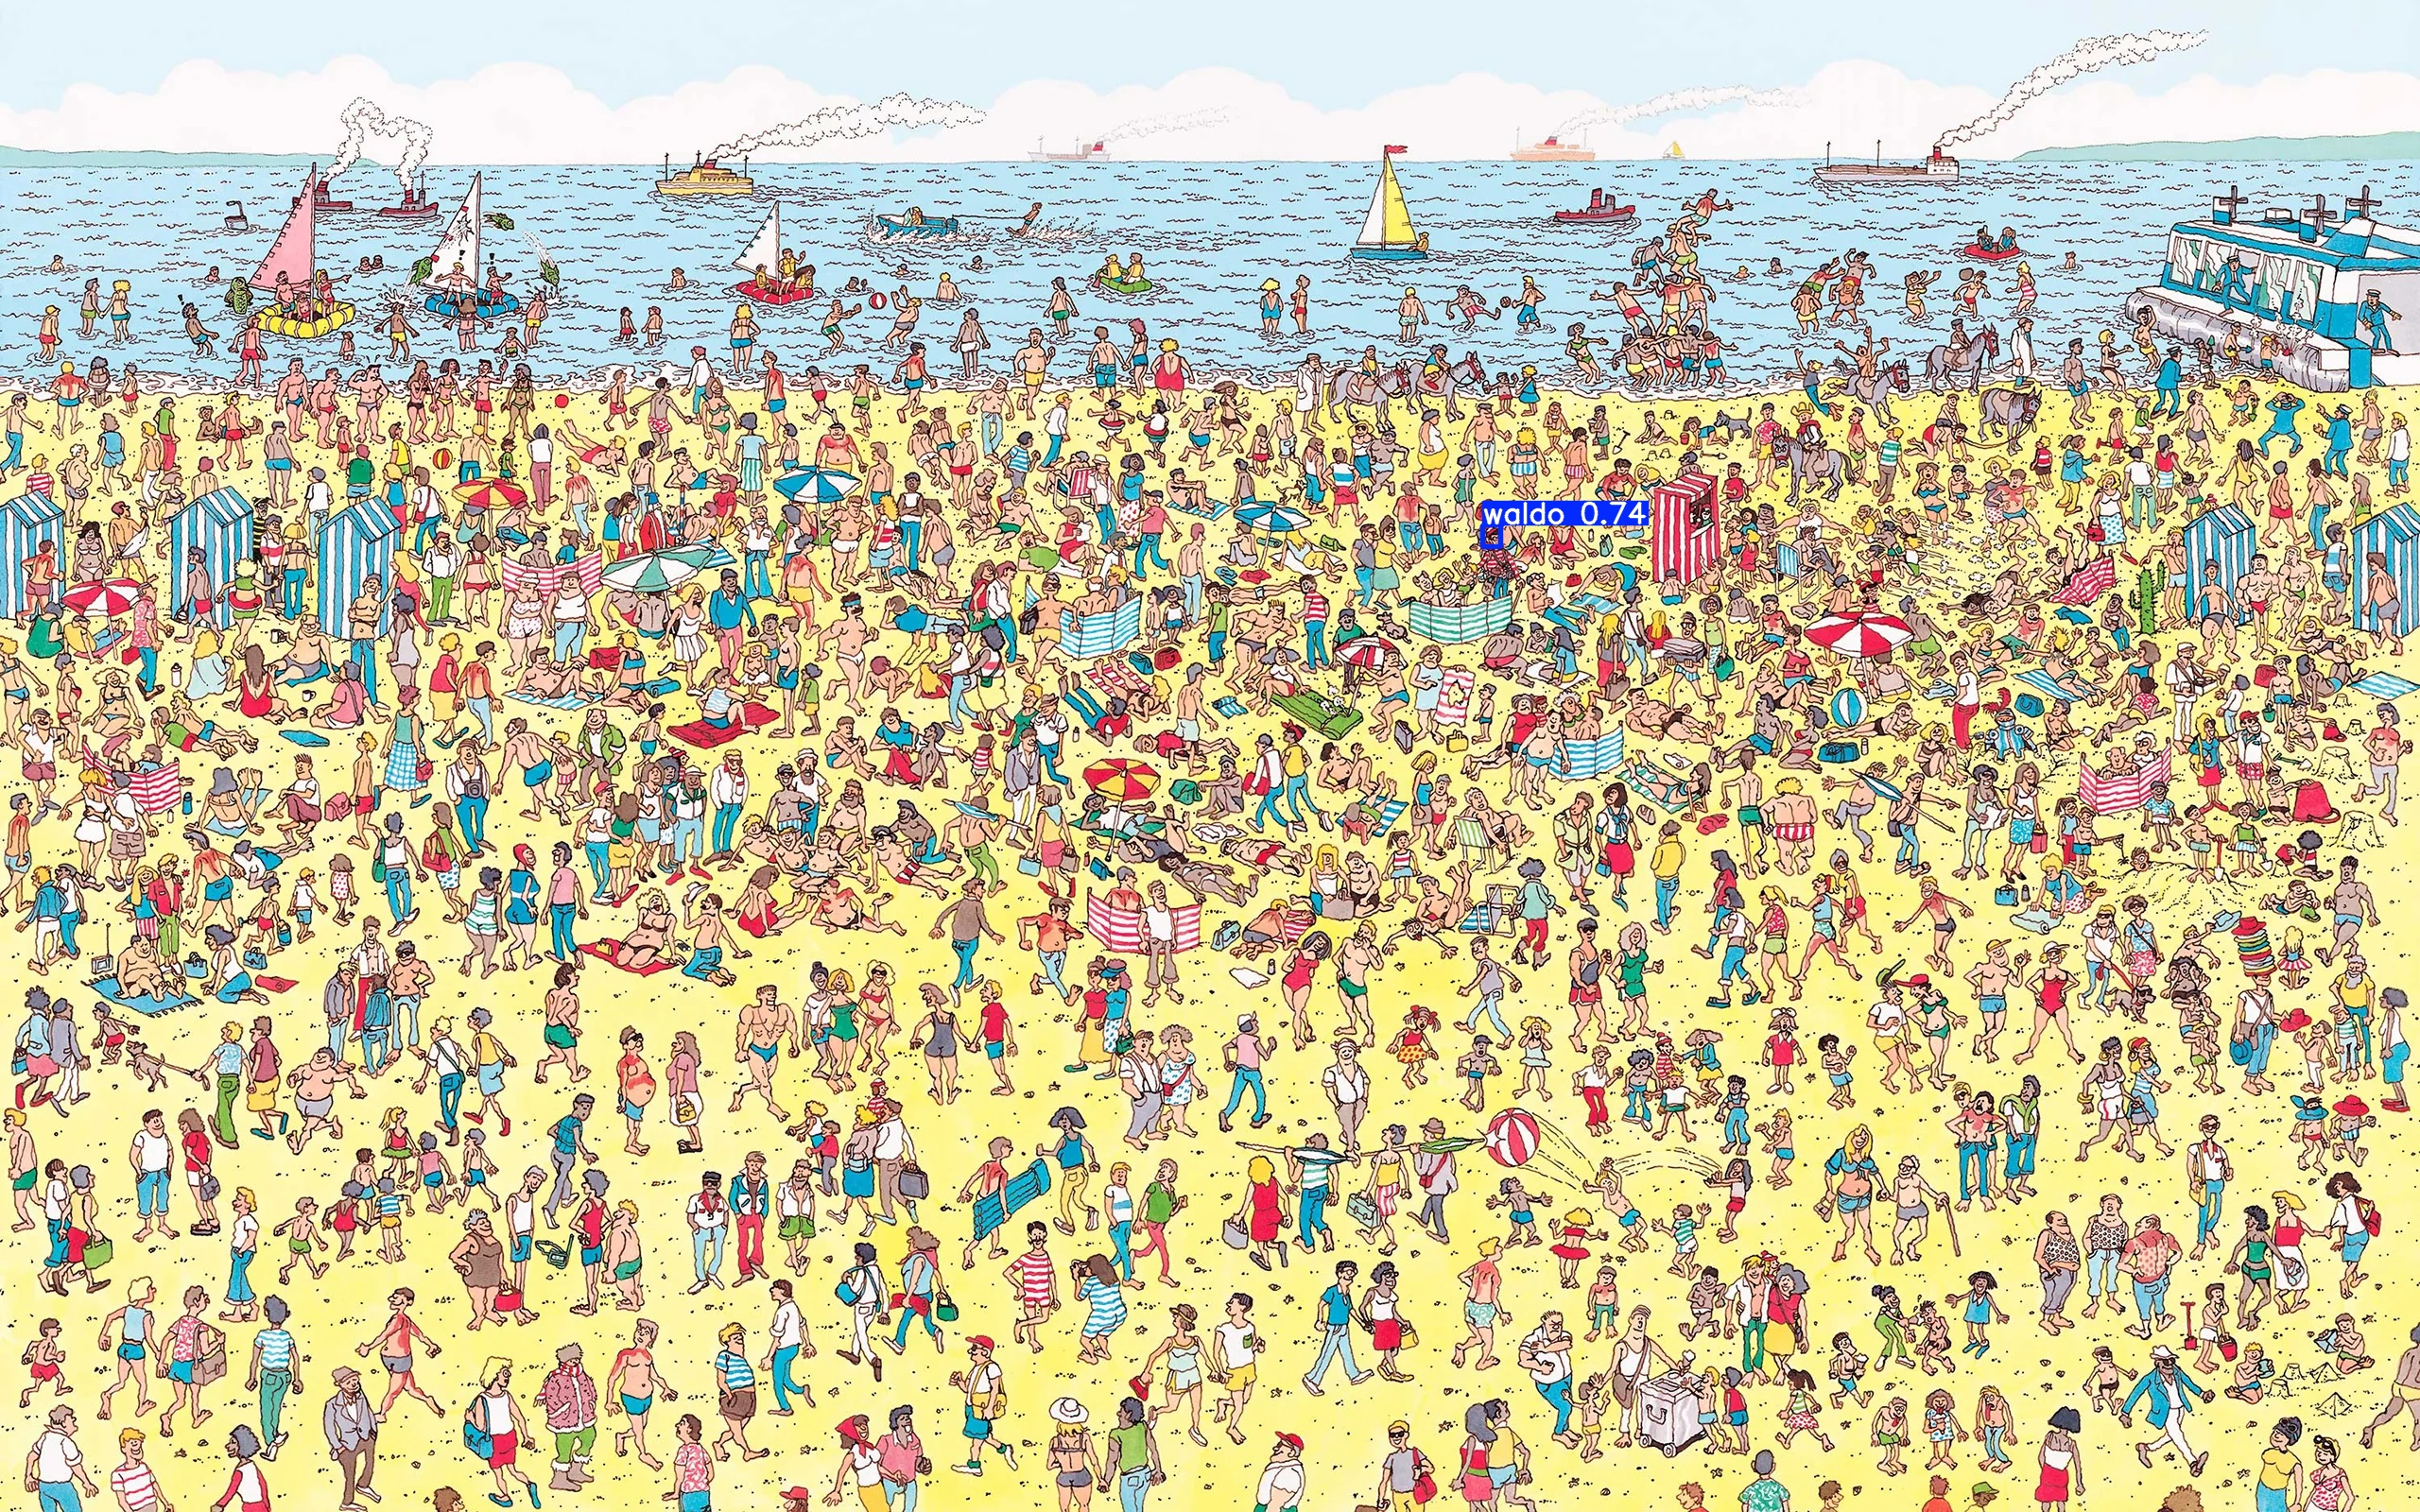

In [ ]:
# Printing the images from the results folder to check
import glob
from IPython.display import Image, display

# Get the list of images with bounding boxes
image_paths = glob.glob('runs/detect/exp5/*.jpg')

# Display the images with bounding boxes
for image_path in image_paths:
    display(Image(filename=image_path))


In [ ]:
# If I want to copy the weights from the current training to My Drive
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
source_folder = '/content/yolov5/runs/train/waldofinal2/'  # Path to the folder in Colab
destination_folder = '/content/drive/MyDrive/weights'  # Path to Google Drive

# Copy the folder from Colab to Google Drive
shutil.copytree(source_folder, destination_folder)

print(f'Folder copied from {source_folder} to {destination_folder}')
